In [1]:
import pandas as pd

from pyprojroot import here

In [2]:
acs = pd.read_csv(here("data/acs_ny.csv"))

In [3]:
acs.columns

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')

In [4]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22745 entries, 0 to 22744
Data columns (total 18 columns):
Acres           22745 non-null object
FamilyIncome    22745 non-null int64
FamilyType      22745 non-null object
NumBedrooms     22745 non-null int64
NumChildren     22745 non-null int64
NumPeople       22745 non-null int64
NumRooms        22745 non-null int64
NumUnits        22745 non-null object
NumVehicles     22745 non-null int64
NumWorkers      22745 non-null int64
OwnRent         22745 non-null object
YearBuilt       22745 non-null object
HouseCosts      22745 non-null int64
ElectricBill    22745 non-null int64
FoodStamp       22745 non-null object
HeatingFuel     22745 non-null object
Insurance       22745 non-null int64
Language        22745 non-null object
dtypes: int64(10), object(8)
memory usage: 3.1+ MB


In [5]:
acs_dummy = pd.get_dummies(acs)

In [6]:
acs_dummy.columns

Index(['FamilyIncome', 'NumBedrooms', 'NumChildren', 'NumPeople', 'NumRooms',
       'NumVehicles', 'NumWorkers', 'HouseCosts', 'ElectricBill', 'Insurance',
       'Acres_1-10', 'Acres_10+', 'Acres_Sub 1', 'FamilyType_Female Head',
       'FamilyType_Male Head', 'FamilyType_Married', 'NumUnits_Mobile home',
       'NumUnits_Single attached', 'NumUnits_Single detached',
       'OwnRent_Mortgage', 'OwnRent_Outright', 'OwnRent_Rented',
       'YearBuilt_15', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959',
       'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989',
       'YearBuilt_1990-1999', 'YearBuilt_2000-2004', 'YearBuilt_2005',
       'YearBuilt_2006', 'YearBuilt_2007', 'YearBuilt_2008', 'YearBuilt_2009',
       'YearBuilt_2010', 'YearBuilt_Before 1939', 'FoodStamp_No',
       'FoodStamp_Yes', 'HeatingFuel_Coal', 'HeatingFuel_Electricity',
       'HeatingFuel_Gas', 'HeatingFuel_None', 'HeatingFuel_Oil',
       'HeatingFuel_Other', 'HeatingFuel_Solar', 'HeatingFuel_Wood

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = acs_dummy.pop("FamilyIncome")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    acs_dummy, y, random_state=42
)

# Linear regression baseline

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression(normalize=True).fit(X_train, y_train)

In [12]:
scores = {"lr_train": lr.score(X_train, y_train), "lr_test": lr.score(X_test, y_test)}
scores

{'lr_train': 0.3459630038880763, 'lr_test': 0.3343721574168691}

In [13]:
model_coefs = pd.DataFrame(zip(acs_dummy.columns, lr.coef_),
                           columns = ["variable", "lr"])
model_coefs

,variable,lr
0,NumBedrooms,3.011428e+03
1,NumChildren,4.848688e+03
2,NumPeople,-7.922350e+03
3,NumRooms,4.921848e+03
4,NumVehicles,6.411993e+03
5,NumWorkers,1.982488e+04
6,HouseCosts,2.823532e+01
7,ElectricBill,4.446806e+01
8,Insurance,1.911794e+01
9,Acres_1-10,1.376206e+18


# LASSO

In [14]:
from sklearn.linear_model import Lasso

In [15]:
lasso = Lasso(alpha=1, normalize=True, random_state=42).fit(X_train, y_train)

In [16]:
ldf = pd.DataFrame(zip(acs_dummy.columns, lasso.coef_), columns=["variable", "lasso"])

In [17]:
scores.update({"lasso_train": lasso.score(X_train, y_train), "lasso_test": lasso.score(X_test, y_test)})

In [18]:
model_coefs = pd.merge(model_coefs, ldf, on="variable")

In [19]:
def highlight_zero(s):
    """highlight cells that are 0"""
    zero = s == 0
    return ["background-color: grey" if v else "" for v in zero]

In [20]:
model_coefs.style.apply(highlight_zero)

,variable,lr,lasso
0,NumBedrooms,3011.43,2823.96
1,NumChildren,4848.69,4017.37
2,NumPeople,-7922.35,-7481.79
3,NumRooms,4921.85,4838.67
4,NumVehicles,6411.99,6245.68
5,NumWorkers,19824.9,19437.6
6,HouseCosts,28.2353,28.2001
7,ElectricBill,44.4681,45.4436
8,Insurance,19.1179,18.9813
9,Acres_1-10,1.37621e+18,0


# Ridge

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha=1, fit_intercept=True, normalize=True, random_state=0).fit(X_train, y_train)

In [23]:
rdf = pd.DataFrame(zip(acs_dummy.columns, ridge.coef_), columns=["variable", "ridge"])

In [24]:
scores.update({"ridge_train": ridge.score(X_train, y_train), "ridge_test": ridge.score(X_test, y_test)})

In [25]:
model_coefs = pd.merge(model_coefs, rdf, on="variable")

In [26]:
model_coefs.style.apply(highlight_zero)

,variable,lr,lasso,ridge
0,NumBedrooms,3011.43,2823.96,4171.45
1,NumChildren,4848.69,4017.37,285.655
2,NumPeople,-7922.35,-7481.79,-612.715
3,NumRooms,4921.85,4838.67,3078.27
4,NumVehicles,6411.99,6245.68,4317.08
5,NumWorkers,19824.9,19437.6,8949.09
6,HouseCosts,28.2353,28.2001,14.7011
7,ElectricBill,44.4681,45.4436,52.0205
8,Insurance,19.1179,18.9813,12.7139
9,Acres_1-10,1.37621e+18,0,193.342


# Elastic Net

In [27]:
from sklearn.linear_model import ElasticNet

In [28]:
en = ElasticNet(alpha=1, l1_ratio=.5, normalize=True, random_state=42).fit(X_train, y_train)

In [29]:
edf = pd.DataFrame(zip(acs_dummy.columns, en.coef_), columns=["variable", "elastic"])
scores.update({"elastic_train": en.score(X_train, y_train), "elastic_test": en.score(X_test, y_test)})
model_coefs = pd.merge(model_coefs, edf, on="variable")
model_coefs.style.apply(highlight_zero)

,variable,lr,lasso,ridge,elastic
0,NumBedrooms,3011.43,2823.96,4171.45,2.68831
1,NumChildren,4848.69,4017.37,285.655,0.370049
2,NumPeople,-7922.35,-7481.79,-612.715,0.664814
3,NumRooms,4921.85,4838.67,3078.27,1.44069
4,NumVehicles,6411.99,6245.68,4317.08,2.45529
5,NumWorkers,19824.9,19437.6,8949.09,3.35269
6,HouseCosts,28.2353,28.2001,14.7011,0.0049161
7,ElectricBill,44.4681,45.4436,52.0205,0.0276862
8,Insurance,19.1179,18.9813,12.7139,0.005039
9,Acres_1-10,1.37621e+18,0,193.342,-0.0584345


In [30]:
scores

{'lr_train': 0.3459630038880763,
 'lr_test': 0.3343721574168691,
 'lasso_train': 0.3461041677298392,
 'lasso_test': 0.3357666294207192,
 'ridge_train': 0.3033227491411943,
 'ridge_test': 0.31797589942720883,
 'elastic_train': 0.00022382318013880464,
 'elastic_test': -0.0007368115181030087}

In [31]:
scores_df = pd.DataFrame(scores.values(), scores.keys(), columns=["score"])
scores_df

,score
lr_train,0.345963
lr_test,0.334372
lasso_train,0.346104
lasso_test,0.335767
ridge_train,0.303323
ridge_test,0.317976
elastic_train,0.000224
elastic_test,-0.000737


In [32]:
scores_df['model_group'] = scores_df.index

In [33]:
scores_df[['model', 'group']] = scores_df["model_group"].str.split("_", expand=True)

In [34]:
scores_df.reset_index()

,index,score,model_group,model,group
0,lr_train,0.345963,lr_train,lr,train
1,lr_test,0.334372,lr_test,lr,test
2,lasso_train,0.346104,lasso_train,lasso,train
3,lasso_test,0.335767,lasso_test,lasso,test
4,ridge_train,0.303323,ridge_train,ridge,train
5,ridge_test,0.317976,ridge_test,ridge,test
6,elastic_train,0.000224,elastic_train,elastic,train
7,elastic_test,-0.000737,elastic_test,elastic,test


In [35]:
import seaborn as sns

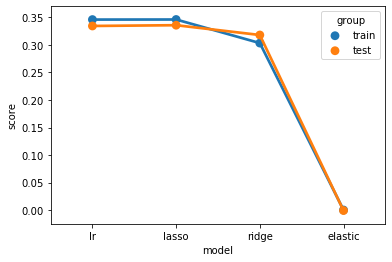

In [36]:
sns.pointplot(x="model", y="score", hue="group", data=scores_df)